In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qubit_approximant import *
from qubit_approximant.cost._cost_metrics import mse, rmse

%matplotlib inline

In [12]:
import pandas as pd

df = pd.read_csv('OneHot_Encoding.csv')
onehot_vector = df['Word_Count'].to_numpy(dtype=float)[:2**11]  # usaremos 11 qubits i.e 2048 palabras
onehot_vector = onehot_vector / np.sqrt(np.sum(onehot_vector**2))
# onehot_vector = onehot_vector / onehot_vector[0]
onehot_vector = onehot_vector

x = np.linspace(0, 1, onehot_vector.size)
fn = onehot_vector
layers = 10

errors = []
param_list = []
for i in range(3,7):
    np.random.seed(i)
    params = 0.7 * np.random.randn(3 * layers)

    model = RxRyModel(x=x, encoding="amp")
    cost = Cost(fn, model, metric="rmse")
    opt = BlackBoxOptimizer(method="L-BFGS-B", method_kwargs={"ftol": 1e-10, "gtol": 1e-10})
    params = opt(cost, cost.grad, params)
    fn_approx = model(params)
    param_list.append(params)
    errors.append(cost(params))

print(errors)

In [ ]:
cost = Cost(fn, model, metric="mse")

In [ ]:
cost(param_list[1])

0.0003276473092300038

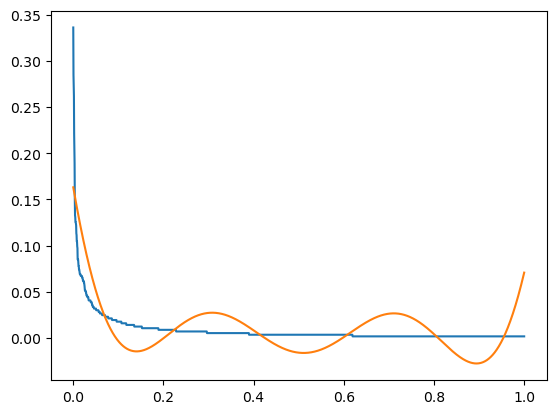

In [ ]:
fn_approx = model(param_list[0])
plt.plot(x, fn)
plt.plot(x, fn_approx)

In [37]:
min(errors)

0.00010874225280430303

In [35]:
fn[0] - fn_approx[0]

(0.23602743168545998-0.009300974838015952j)

5.26045532355948e-07


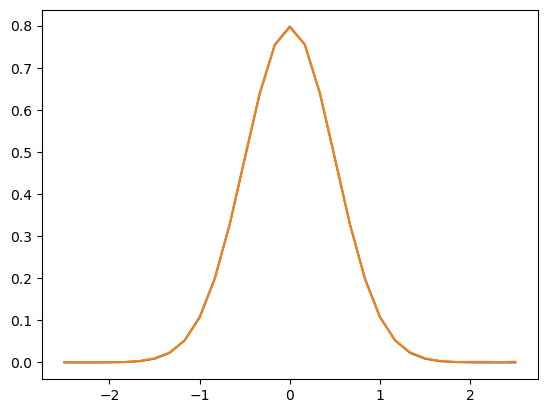

In [7]:
x = np.linspace(-2.5, 2.5, 31)
fn = np.exp(-((x) ** 2) / (2 * 0.5**2)) / (0.5 * np.sqrt(2 * np.pi))
layers = 10
np.random.seed(2)
params = 0.7 * np.random.randn(3 * layers)

model = RxRyModel(x=x, encoding="prob")
cost = Cost(fn, model, metric="log_cosh")
opt = BlackBoxOptimizer(method="L-BFGS-B", method_kwargs={"ftol": 1e-9, "gtol": 1e-9})
params = opt(cost, cost.grad, params)
fn_approx = model(params)

print(cost(params))
plt.plot(x, fn)
plt.plot(x, fn_approx)